# 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

데이터 파일
 - 대한민국_헌법_ words.txt
 - korea_law_mask.png
 - en-a_new_hope.txt
 - stormtrooper_mask.png

In [89]:
!pip install WordCloud

Text(0.5, 1.0, '한글 테스트')

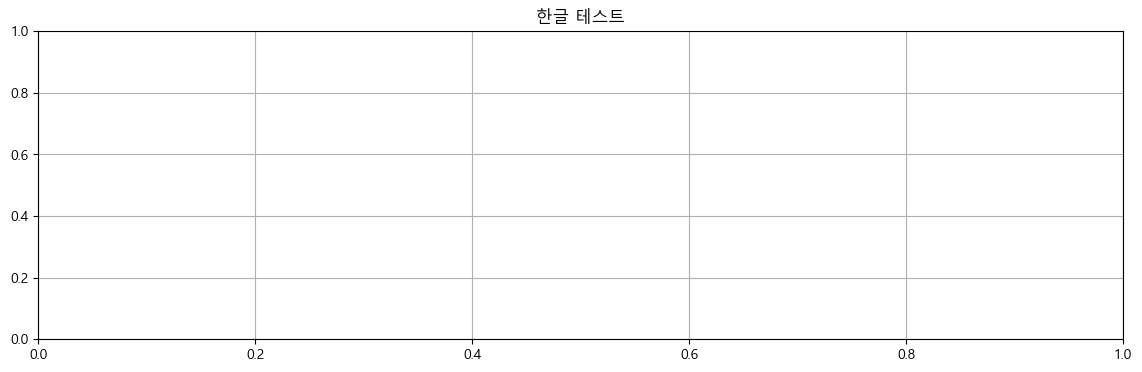

In [90]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)


font_path = 'C:/Windows/Fonts/Malgun.ttf'
# font_path = "seguisym"
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

In [91]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

## Mask 만들기

1. gimp
2. white 배경의 검정 마스크

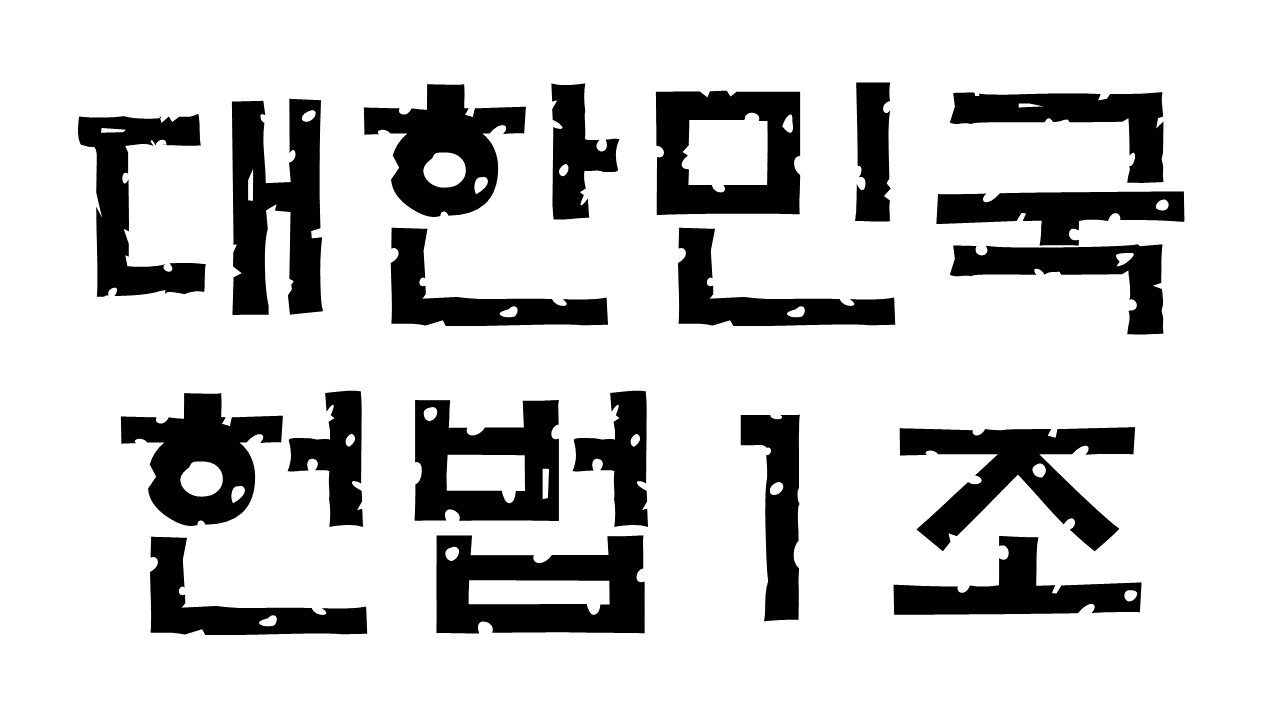

In [92]:
flag_mask = np.array(Image.open('korea_law_mask.png'))
from IPython.display import Image as IPImage
flag_mask
IPImage('korea_law_mask.png')

In [93]:
flag_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# 대한민국 헌법

In [94]:
with open('words1130.txt', 'rt', encoding='utf-8') as f:
    text = f.read()
    

In [95]:
text[:10]

'전문 유구한 역사와'

In [96]:
text = text.split(' ')
text[:10]

['전문',
 '유구한',
 '역사와',
 '전통에',
 '빛나는',
 '대한국민은',
 '3·1운동으로',
 '건립된',
 '대한민국임시정부의',
 '법통과']

## 빈도 만들기: Counter

In [97]:
from collections import Counter

In [98]:
text_counter = Counter(text)

In [99]:
text_counter.most_common(10), len(text)

([('법률로', 101),
  ('한다.', 71),
  ('있다.', 67),
  ('정하는', 55),
  ('또는', 51),
  ('모든', 41),
  ('정한다.', 40),
  ('가진다.', 35),
  ('국가는', 34),
  ('바에', 34)],
 4471)

## 빈도 만들기: Series

In [100]:
# 텍스트 단어 빈도수2
import pandas as pd
import wordcloud

text_bin = pd.Series(text)

In [101]:
text_bin[:10]

0           전문
1          유구한
2          역사와
3          전통에
4          빛나는
5        대한국민은
6      3·1운동으로
7          건립된
8    대한민국임시정부의
9          법통과
dtype: object

In [102]:
text_bin[text_bin.duplicated()]

40      바탕으로
47        모든
52       하고,
82       자유와
112       모든
        ... 
4463      시행
4464     당시의
4467     헌법에
4468      따른
4470     본다.
Length: 2250, dtype: object

In [103]:
text_bin.value_counts()[:10]  # top 10  빈도수

법률로     101
한다.      71
있다.      67
정하는      55
또는       51
모든       41
정한다.     40
가진다.     35
국가는      34
바에       34
dtype: int64

In [118]:
#from wordcloud import wordcloud, STOPWORDS

import numpy as np
from PIL import Image

#wc.generate_from_text(text)

#plt.figure(figsize=(12,12))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis('off')
#plt.show()

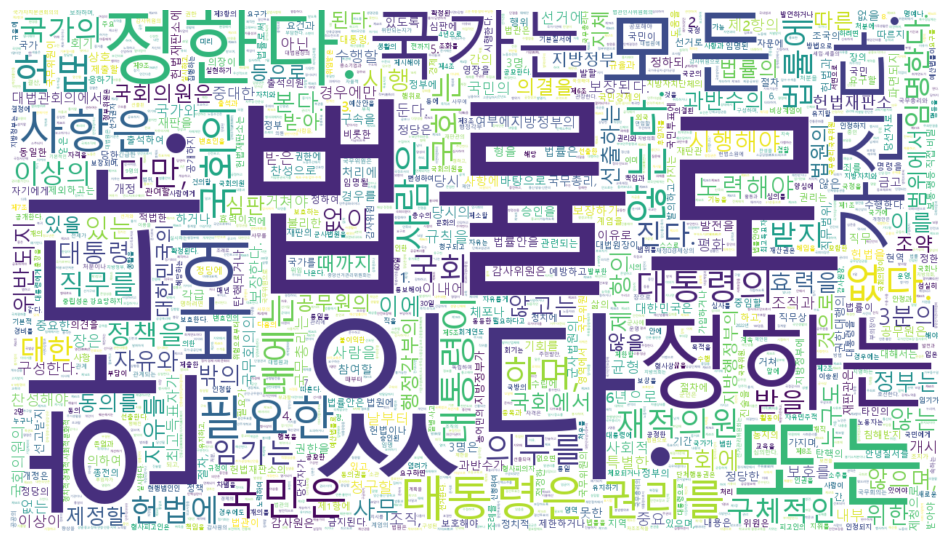

In [110]:
wc = WordCloud(background_color='white', 
               font_path= font_path,
               max_words=2000, 
               mask=flag_mask)
wc.generate_from_frequencies(dict(text_counter))
# wc = wc.generate(''.join(results))
# wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

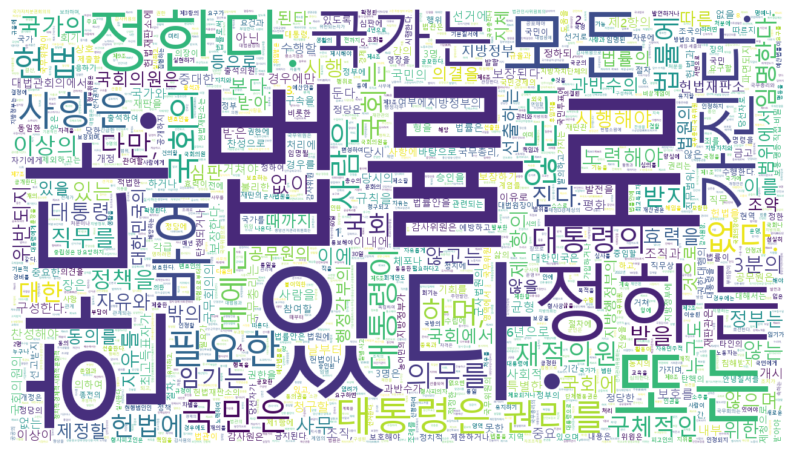

In [117]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 스타워즈

In [121]:
text = open('en-a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
 
mask = np.array(Image.open('en-stormtrooper_mask.png'))

In [122]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [123]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [124]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

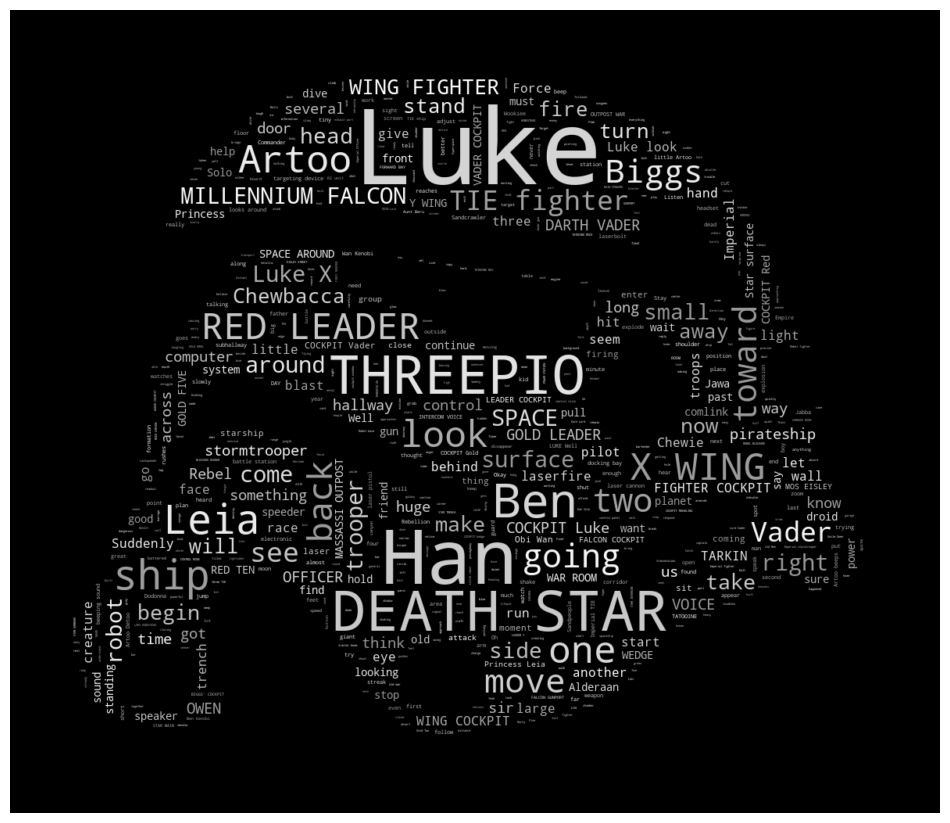

In [125]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()